In [26]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [2]:
#Lendo os dados do tracker em csv
dados = pd.read_csv('Pêndulo_Caneta.csv')
tempo = dados['t'].values
posicao_pendulo = dados['x'].values

In [28]:
#Os dados do Tracker são srtings. Logo, preciso transformá-los em floats
tempo_float = []
posicao_float = []

for string_numero in tempo:
    string_numero = string_numero.replace(',', '.')
    tempo_float.append(float(string_numero))

for string_numero in posicao_pendulo:
    string_numero = string_numero.replace(',', '.')
    posicao_float.append(float(string_numero))

print("Vetor de tempo (instante): ",tempo_float)
print('Vetor de posição angular: ',posicao_float)

Vetor de tempo (instante):  [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0, 17.5, 18.0, 18.5, 19.0, 19.5, 20.0, 20.5, 21.0, 21.5, 22.0, 22.5, 23.0, 23.5, 24.0, 24.5, 25.0, 25.5, 26.0, 26.5, 27.0, 27.5, 28.0, 28.5, 29.0, 29.5, 30.0, 30.5, 31.0, 31.5, 32.0, 32.5, 33.0, 33.5, 34.0, 34.5, 35.0, 35.5, 36.0, 36.5, 37.0, 37.5, 38.0, 38.5, 39.0, 39.5, 40.0, 40.5, 41.0, 41.5, 42.0, 42.5, 43.0, 43.5, 44.0, 44.5, 45.0, 45.5, 46.0, 46.5, 47.0, 47.5, 48.0, 48.5, 49.0, 49.5, 50.0, 50.5, 51.0, 51.5, 52.0, 52.5, 53.0, 53.5, 54.0, 54.5, 55.0, 55.5, 56.0, 56.5, 57.0, 57.5, 58.0, 58.5, 59.0, 59.5, 60.0, 60.5, 61.0, 61.5, 62.0, 62.5, 63.0, 63.5, 64.0, 64.5, 65.0, 65.5, 66.0, 66.5, 67.0, 67.5, 68.0, 68.5, 69.0, 69.5, 70.0, 70.5, 71.0, 71.5, 72.0, 72.5, 73.0, 73.5, 74.0, 74.5, 75.0, 75.5, 76.0, 76.5, 77.0, 77.5]
Vetor de posição angular:  [0.0443, 0.0392, 0.037, 0.01

In [4]:
#Equação do Pêndulo Amortecido
def model(alpha, t, A, omega, phi, k):
    f = np.exp(-alpha*t)*A*np.sin(omega*t+phi) + k
    return f

In [29]:
# Chute inicial
initial_guess = [1.0, 1.0, 1.0, 1.0, 1.0]  # (alpha, A, omega, phi, k)

# Usar curve_fit para ajustar os parâmetros
params, covariance = curve_fit(model, tempo_float, posicao_float, p0=initial_guess)

# Calculando os erros
std_errors = np.sqrt(np.diag(covariance))

# Print dos parâmetros estimados com seus erros
print("Parâmetros estimados:")
print("alpha:", params[0], "±", std_errors[0])
print("A:", params[1], "±", std_errors[1])
print("omega:", params[2], "±", std_errors[2])
print("phi:", params[3], "±", std_errors[3])
print("k:", params[4], "±", std_errors[4])

Parâmetros estimados:
alpha: 0.004075700700362117 ± 0.00020411140284152423
A: 0.057252361819219125 ± 0.00048330888193432483
omega: 0.8130713816585534 ± 0.00021010620702584126
phi: 1.6080137773946623 ± 0.008619494937281869
k: -0.009085361812208913 ± 0.00016108089507305758


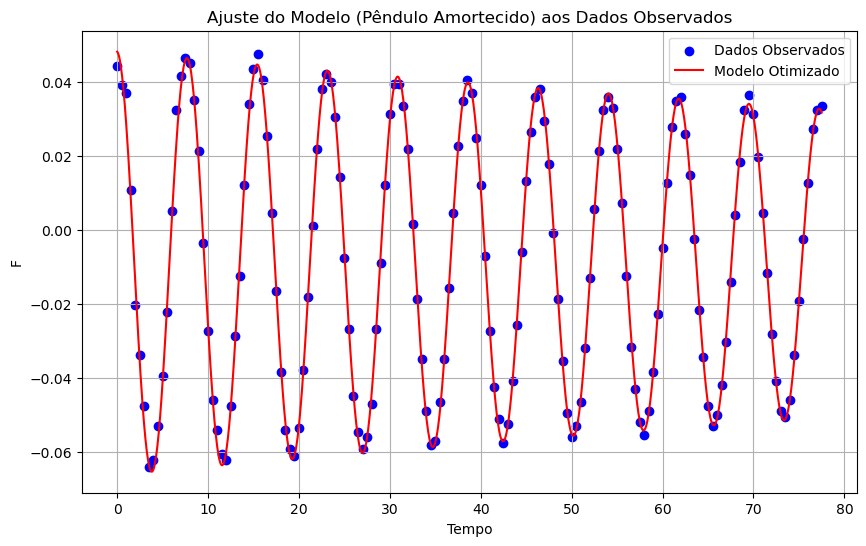

In [30]:
t_model = np.linspace(min(tempo_float), max(tempo_float), 1000)
f_model = model(t_model, *params)

# Plotar dados observados e modelo otimizado
plt.figure(figsize=(10, 6))
plt.scatter(tempo_float, posicao_float, label='Dados Observados', color='blue')
plt.plot(t_model, f_model, label='Modelo Otimizado', color='red')
plt.xlabel('Tempo')
plt.ylabel('F')
plt.legend()
plt.title('Ajuste do Modelo (Pêndulo Amortecido) aos Dados Observados')
plt.grid(True)
plt.show()